In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('/content/heart.csv')

In [36]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [37]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [39]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

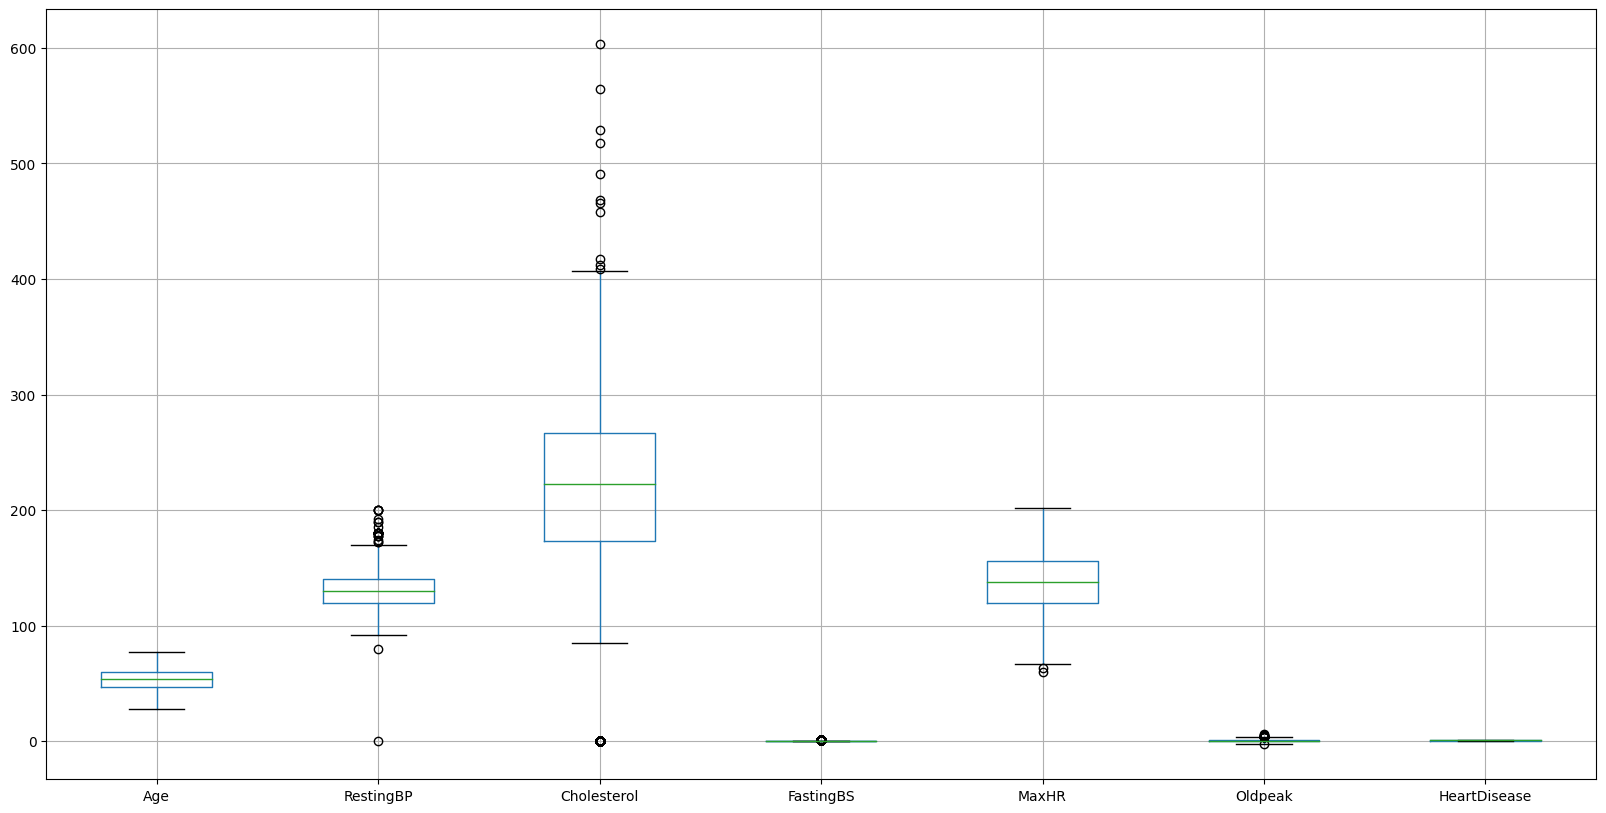

In [40]:
df.boxplot(figsize=(20,10))

<Axes: ylabel='Cholesterol'>

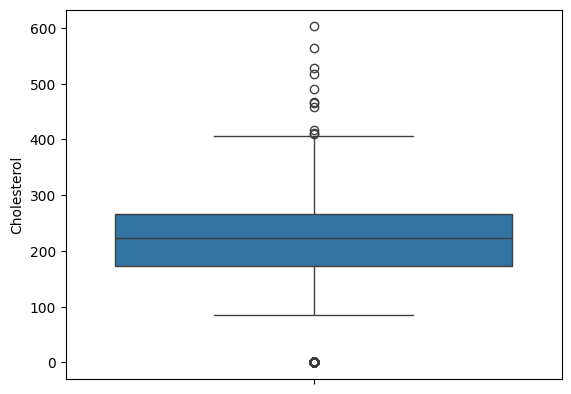

In [41]:
sns.boxplot(df['Cholesterol'])

In [42]:
Q1 = np.percentile(df['Cholesterol'],25,interpolation='midpoint')
Q2 = np.percentile(df['Cholesterol'],50,interpolation='midpoint')
Q3 = np.percentile(df['Cholesterol'],75,interpolation='midpoint')

IQR = Q3-Q1
print(IQR)

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

print(upper_limit)
print(lower_limit)

93.5
407.25
33.25


In [43]:
df1 = df['Cholesterol']>upper_limit
df1

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Name: Cholesterol, Length: 918, dtype: bool

In [44]:
df.loc[df1]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
250,44,M,ASY,135,491,0,Normal,135,N,0.0,Flat,1
496,58,M,ASY,132,458,1,Normal,69,N,1.0,Down,0
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0
667,65,F,NAP,140,417,1,LVH,157,N,0.8,Up,0


In [45]:
df.loc[df1].index

Int64Index([28, 30, 69, 76, 103, 149, 250, 496, 616, 667, 796], dtype='int64')

In [46]:
df.drop([28, 30, 69, 76, 103, 149, 250, 496, 616, 667, 796],inplace=True,axis=0)

In [47]:
df.reset_index(inplace=True)

In [48]:
df.head()

,index,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [49]:
df.drop('index',axis=1,inplace=True)

In [50]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [51]:
df.nunique()


Age                50
Sex                 2
ChestPainType       4
RestingBP          66
Cholesterol       211
FastingBS           2
RestingECG          3
MaxHR             118
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [53]:
for i in ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']:
  df[i] = le.fit_transform(df[i])


In [54]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [55]:
x = df.drop(['RestingBP','Cholesterol','MaxHR','Oldpeak'],axis=1)
y = df[['RestingBP','Cholesterol','MaxHR','Oldpeak']]

In [56]:
y.head()

,RestingBP,Cholesterol,MaxHR,Oldpeak
0,140,289,172,0.0
1,160,180,156,1.0
2,130,283,98,0.0
3,138,214,108,1.5
4,150,195,122,0.0


In [57]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [58]:
newy = minmax.fit_transform(y)

In [61]:
y= pd.DataFrame(newy,columns=('RestingBP',	'Cholesterol',	'MaxHR',	'Oldpeak'))

In [62]:
df = pd.concat([y,x],axis=1)

In [63]:
df.head()

,RestingBP,Cholesterol,MaxHR,Oldpeak,Age,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,0.70,0.710074,0.788732,0.295455,40,1,1,0,1,0,2,0
1,0.80,0.442260,0.676056,0.409091,49,0,2,0,1,0,1,1
2,0.65,0.695332,0.267606,0.295455,37,1,1,0,2,0,2,0
3,0.69,0.525799,0.338028,0.465909,48,0,0,0,1,1,1,1
4,0.75,0.479115,0.436620,0.295455,54,1,2,0,1,0,2,0


In [64]:
# NAIVE BAYES MODEL CLASSIFICATION

In [65]:
x = df.drop('HeartDisease',axis=1)
x1 = pd.DataFrame(x)
y = df['HeartDisease']
y1 = pd.DataFrame(y)


from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25,random_state=42)

In [66]:
from sklearn.naive_bayes import GaussianNB
NBG = GaussianNB()
model1 = NBG.fit(x1_train,y1_train)
y1_pred1 = model1.predict(x1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
from sklearn.naive_bayes import MultinomialNB
NBM =MultinomialNB()
model2 = NBM.fit(x1_train,y1_train)
y1_pred2 = model2.predict(x1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
from sklearn.naive_bayes import BernoulliNB
NBB = BernoulliNB()
model3 = NBB.fit(x1_train,y1_train)
y1_pred3=model3.predict(x1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:

from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report

acc_score1=accuracy_score(y1_test,y1_pred1)
acc_score2=accuracy_score(y1_test,y1_pred2)
acc_score3=accuracy_score(y1_test,y1_pred3)
print(acc_score1)
print(acc_score2)
print(acc_score3)

0.8370044052863436
0.7973568281938326
0.7973568281938326


In [73]:
# gaussien have more validating so uts have accuracy of predicting


In [74]:
df.head()

,RestingBP,Cholesterol,MaxHR,Oldpeak,Age,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,0.70,0.710074,0.788732,0.295455,40,1,1,0,1,0,2,0
1,0.80,0.442260,0.676056,0.409091,49,0,2,0,1,0,1,1
2,0.65,0.695332,0.267606,0.295455,37,1,1,0,2,0,2,0
3,0.69,0.525799,0.338028,0.465909,48,0,0,0,1,1,1,1
4,0.75,0.479115,0.436620,0.295455,54,1,2,0,1,0,2,0


In [75]:
model1.predict([[0.70,	0.710074,	0.788732,	0.295455,	40,	1,	1,	0,	1,	0,	2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [76]:
model1.predict([[0.75,	0.479115,	0.436620,	0.295455,	54,	1,	2,	0,	1,	0,	2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [77]:
model1.predict([[0.69,	0.525799,	0.338028,	0.465909,	48,	0,	0,	0,	1,	1,	1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])